In [6]:
#https://www.kaggle.com/code/hosseinbehjat/house-price-just-with-categorical-features
#This is a follow along with the link above. 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [15]:
train_df = pd.read_csv(r"C:\Users\15402\Documents\House Prices - Advanced Regression Techniques\train.csv", index_col ='Id')
test_df = pd.read_csv(r"C:\Users\15402\Documents\House Prices - Advanced Regression Techniques\test.csv", index_col ='Id')

In [16]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Examine the Features
First of all we will dig into columns with the object data type

In [18]:
pd.set_option('max_row',None)
u_df = train_df.nunique().sort_values()

In [20]:
print(f'All columns with their unique values:\n {u_df}\n\n')
col_could_encode = [col for col in train_df.columns if train_df[col].nunique() < 30]
c_df = train_df[col_could_encode].nunique().sort_values()
print(f'Columns that can be encoded with their unique values:\n {c_df}')

All columns with their unique values:
 Street              2
Alley               2
Utilities           2
CentralAir          2
HalfBath            3
PavedDrive          3
BsmtHalfBath        3
LandSlope           3
PoolQC              3
GarageFinish        3
ExterQual           4
KitchenQual         4
MasVnrType          4
BsmtExposure        4
Fence               4
MiscFeature         4
BsmtQual            4
Fireplaces          4
BsmtFullBath        4
LandContour         4
LotShape            4
FullBath            4
KitchenAbvGr        4
BsmtCond            4
GarageCars          5
FireplaceQu         5
GarageQual          5
GarageCond          5
Electrical          5
HeatingQC           5
ExterCond           5
MSZoning            5
YrSold              5
LotConfig           5
BldgType            5
RoofStyle           6
Heating             6
SaleCondition       6
Foundation          6
GarageType          6
BsmtFinType2        6
BsmtFinType1        6
Functional          7
PoolArea       

In [21]:
for index in c_df.index:
    print(train_df[index].value_counts())

Pave    1454
Grvl       6
Name: Street, dtype: int64
Grvl    50
Pave    41
Name: Alley, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Y    1365
N      95
Name: CentralAir, dtype: int64
0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64
Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64
0    913
1    535
2     12
Name: HalfBath, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
1    1392
2      65
3       2
0       1
Name:

## Dropping Useless Features

In [22]:
dropped_columns = ['Street', 'Alley', 'Utilities', 'CentralAir', 'BsmtHalfBath', 'PavedDrive', 'PoolQC',
                   'LandSlope', 'MiscFeature', 'Fence', 'BsmtCond', 'LandContour', 'KitchenAbvGr',  'FireplaceQu',
                  'Electrical', 'ExterCond', 'GarageQual', 'GarageCond', 'BldgType', 'Heating', 'BsmtFinType2',
                  'Functional', 'Condition2', 'RoofMatl', 'PoolArea', 'RoofMatl', 'SaleType', '3SsnPorch',
                  'MiscVal', 'LowQualFinSF']
col_could_encode_remain = [col for col in col_could_encode if col not in dropped_columns]
col_could_encode_remain

['MSSubClass',
 'MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'MoSold',
 'YrSold',
 'SaleCondition']

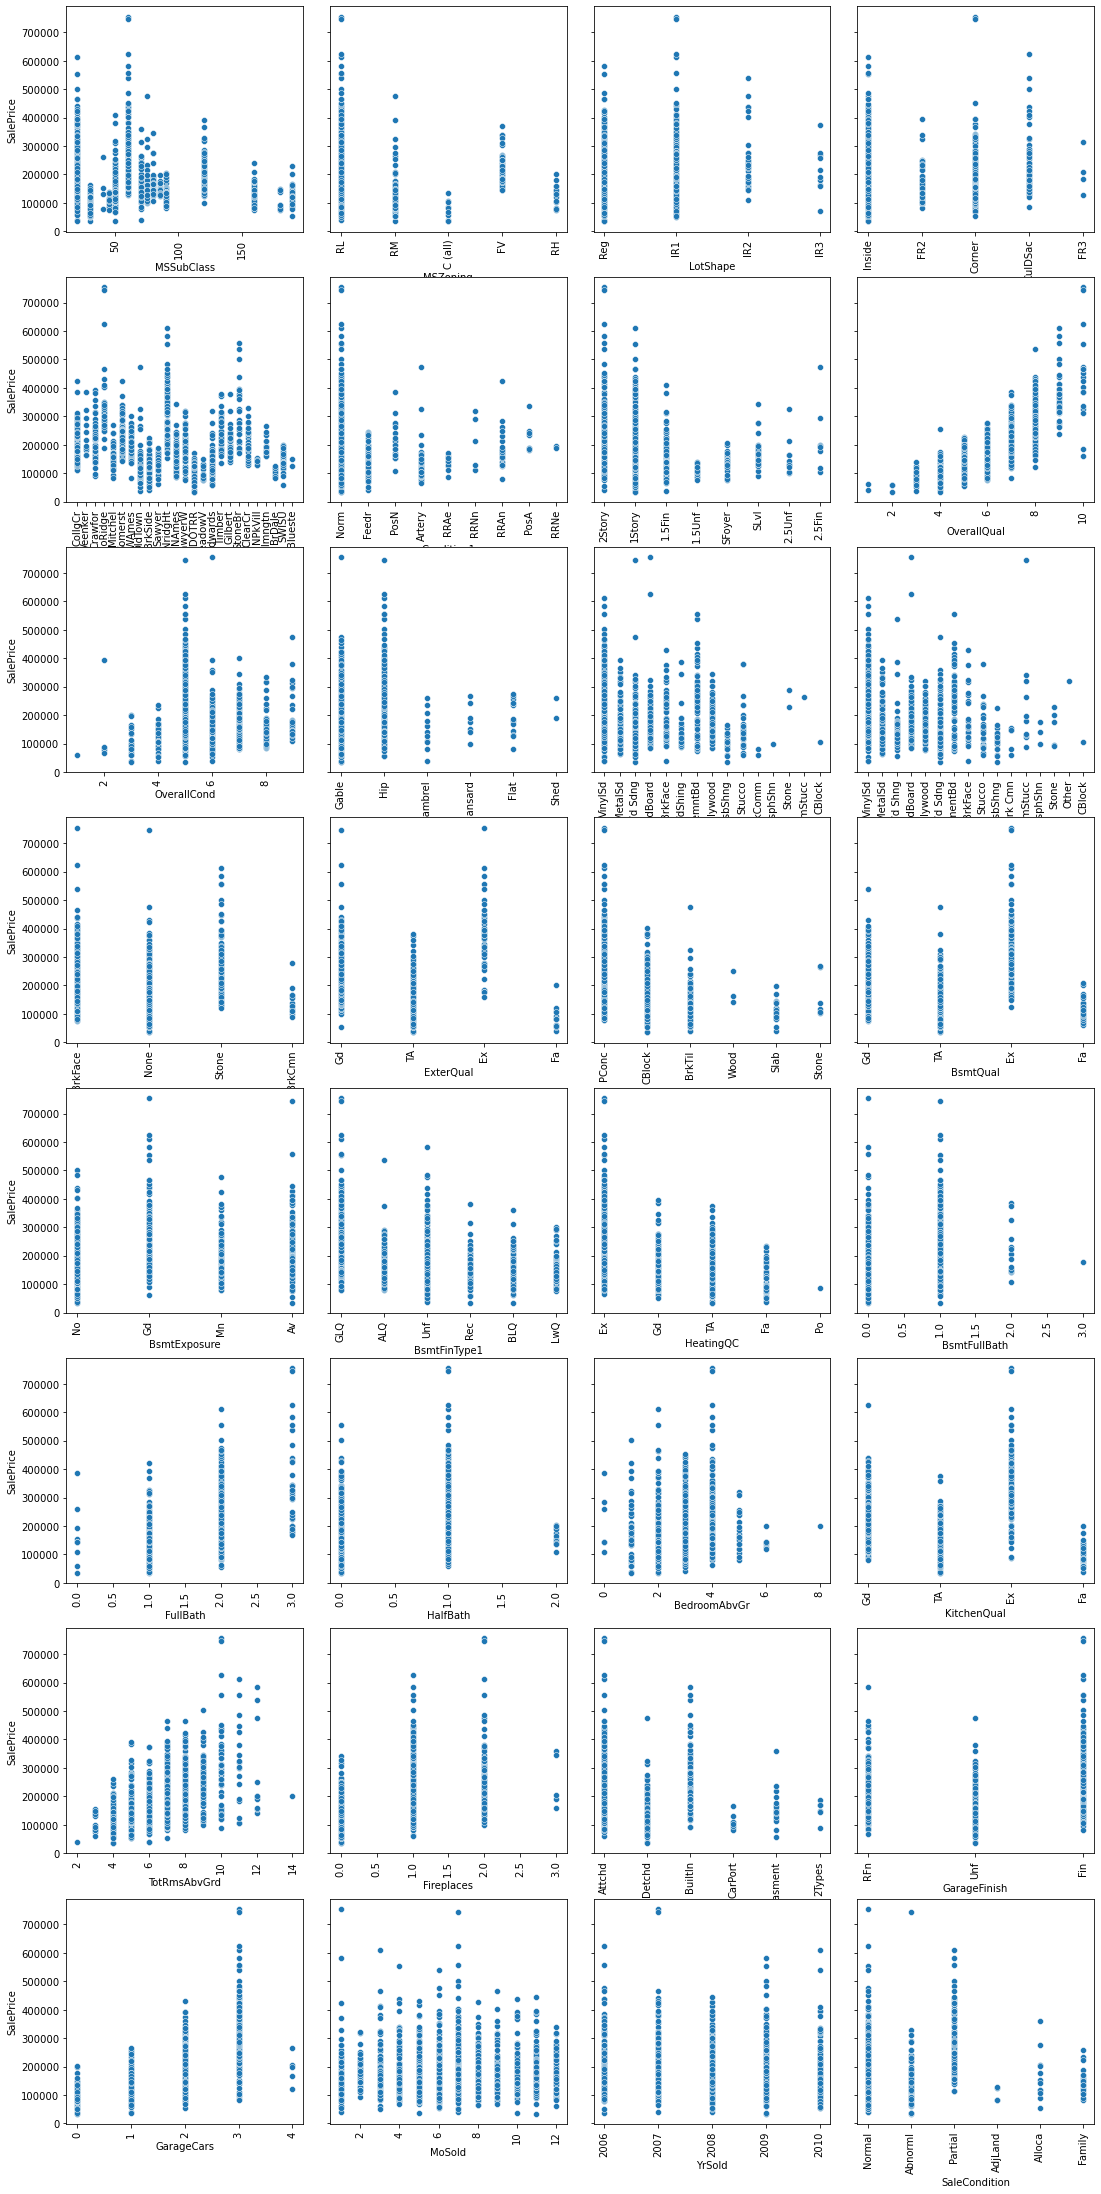

In [24]:
import math 

columns = 4
subplots = int(len(col_could_encode_remain))
rows = math.ceil(subplots/columns)

fig, ax = plt.subplots(rows, columns, sharey=True, figsize=(15,30))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.2)


for i, x in zip(range(subplots), col_could_encode_remain):
    j = i % columns
    sns.scatterplot(data=train_df, x=x, y='SalePrice', ax=ax[int((i-j)/columns),j]).tick_params(axis='x', rotation=90)

In [25]:


object_cols = [col for col in col_could_encode_remain if train_df[col].dtype == 'object']
int_cols = [col for col in col_could_encode_remain if col not in object_cols]



## Impute, Encode, and Model

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor


numerical_transformer = SimpleImputer(strategy='constant')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown="ignore")),
])

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, int_cols),
        ('cat', categorical_transformer, object_cols)
    ]
)

model = RandomForestRegressor(n_estimators=100)

my_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

## Validation

In [27]:
from sklearn.model_selection import cross_val_score


X = train_df[col_could_encode_remain]
y = train_df.SalePrice

scores = -1 * cross_val_score(my_pipeline, X, y,
                             cv=5,
                             scoring='neg_mean_absolute_error')

scores

array([19703.88205969, 22032.62585616, 21263.06585616, 18246.02253425,
       22546.08613014])

## Prediction

In [28]:


X_test = test_df[col_could_encode_remain]
my_pipeline.fit(X, y)
preds = my_pipeline.predict(X_test)
preds



array([119148.94, 149154.75, 169289.3 , ..., 155225.32, 126704.75,
       243526.21])

## Submission

In [29]:


output = pd.DataFrame({'Id': train_df.index[:1459], 'SalePrice':preds})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")



Your submission was successfully saved!
